In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import chardet

with open('Datasets.csv', 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']

df = pd.read_csv(r'Datasets.csv', encoding=encoding)

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.shape

(9994, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'date'],
      dtype='object')

In [11]:
df['date']=pd.to_datetime(df['Order Date'], errors='coerce')

In [12]:
df['year']=df['date'].dt.year

In [13]:
df['monthname']=df['date'].dt.month_name()
df['day']=df['date'].dt.day
df['dayname']=df['date'].dt.day_name()

In [14]:
df.shape

(9994, 26)

In [15]:
df.drop(columns=['Order Date','Ship Date'],axis=1,inplace=True)

In [16]:
df1=df.copy()

In [17]:
df1.head()

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,...,Product Name,Sales,Quantity,Discount,Profit,date,year,monthname,day,dayname
0,1,CA-2016-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016-11-08,2016.0,November,8.0,Tuesday
1,2,CA-2016-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016-11-08,2016.0,November,8.0,Tuesday
2,3,CA-2016-138688,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016-06-12,2016.0,June,12.0,Sunday
3,4,US-2015-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015-10-11,2015.0,October,11.0,Sunday
4,5,US-2015-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015-10-11,2015.0,October,11.0,Sunday


In [18]:
df1.isnull().sum()

Row ID              0
Order ID            0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
date             5952
year             5952
monthname        5952
day              5952
dayname          5952
dtype: int64

In [19]:
df1.shape

(9994, 24)

In [20]:
df1.dropna(inplace=True)

In [21]:
df1.isnull().sum()

Row ID           0
Order ID         0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
date             0
year             0
monthname        0
day              0
dayname          0
dtype: int64

In [22]:
df1.shape

(4042, 24)

In [23]:
df_cus_name=df1.groupby(['Customer Name'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False).head(10)

In [24]:
df_cus_name

,Customer Name,Sales
677,Tamara Chand,18437.138
67,Becky Martin,11432.840
622,Sanjit Engle,10402.534
381,Karen Ferguson,9536.564
283,Grant Thornton,9351.212
116,Caroline Jumper,9166.278
447,Maria Etezadi,8866.712
380,Karen Daniels,8282.358
176,Daniel Raglin,7426.900
2,Adam Bellavance,7354.214


C:\Users\manee\AppData\Local\Temp\ipykernel_15280\4049959280.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df_cus_name,x='Customer Name',y='Sales',palette='Set2')


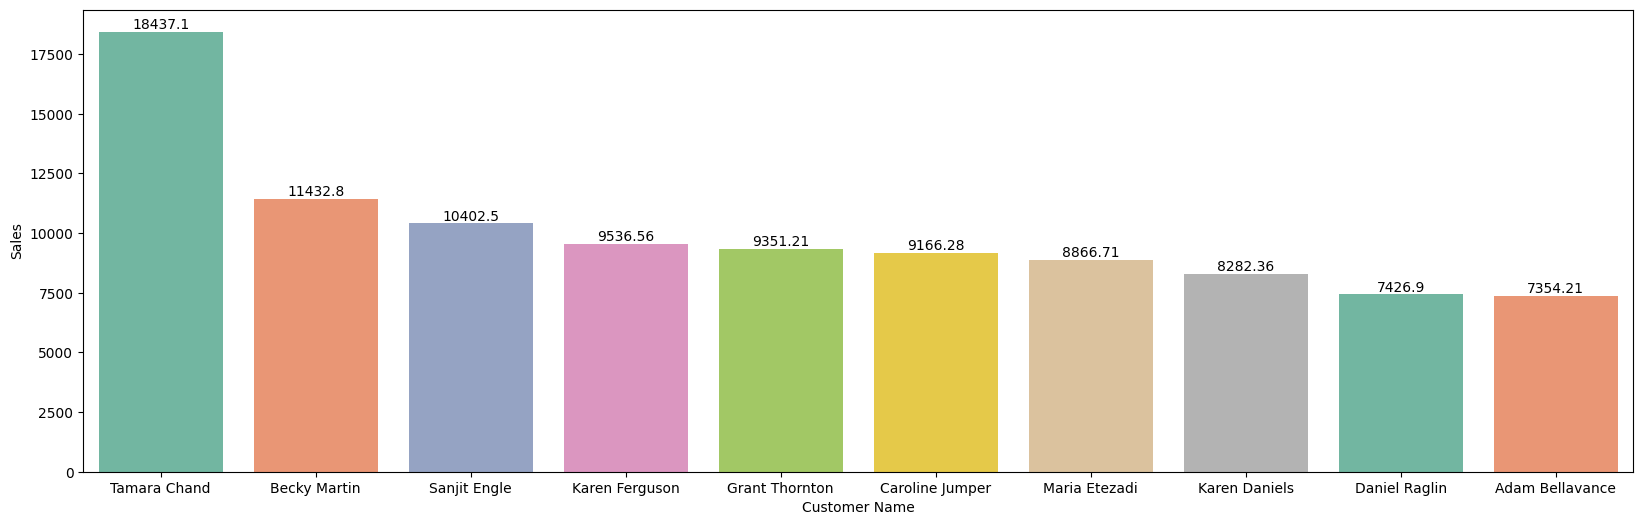

In [25]:
plt.figure(figsize=(20,6))
ax=sns.barplot(data=df_cus_name,x='Customer Name',y='Sales',palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars)

C:\Users\manee\AppData\Local\Temp\ipykernel_15280\2679487221.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df_cus_name,x='Customer Name',y='Quantity',palette='Set2')


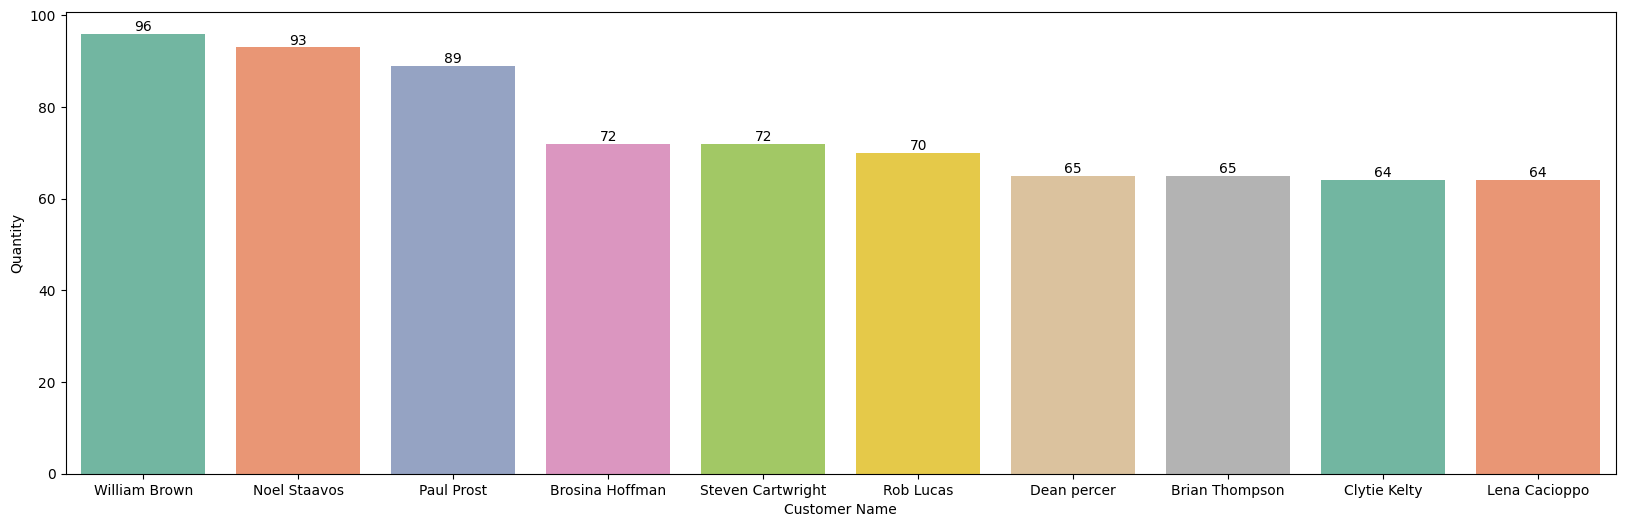

In [26]:
plt.figure(figsize=(20,6))
df_cus_name=df1.groupby(['Customer Name'],as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending=False).head(10)
ax=sns.barplot(data=df_cus_name,x='Customer Name',y='Quantity',palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars)

In [27]:
df1.columns

Index(['Row ID', 'Order ID', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit', 'date', 'year', 'monthname', 'day',
       'dayname'],
      dtype='object')

C:\Users\manee\AppData\Local\Temp\ipykernel_15280\1910975579.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df_city,x='City',y='Sales',palette='Set2')


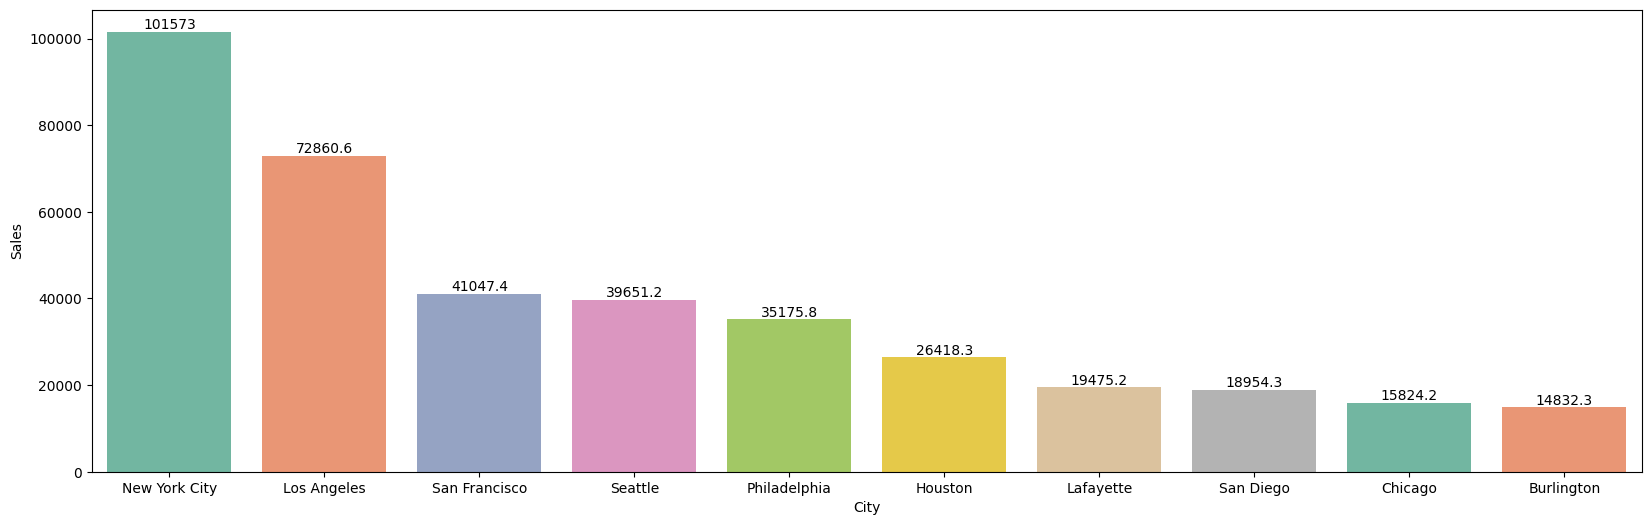

In [28]:
df_city=df1.groupby(['City'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False).head(10)
plt.figure(figsize=(20,6))
ax=sns.barplot(data=df_city,x='City',y='Sales',palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars)

C:\Users\manee\AppData\Local\Temp\ipykernel_15280\2179703936.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df_city,x='City',y='Quantity',palette='Set2')


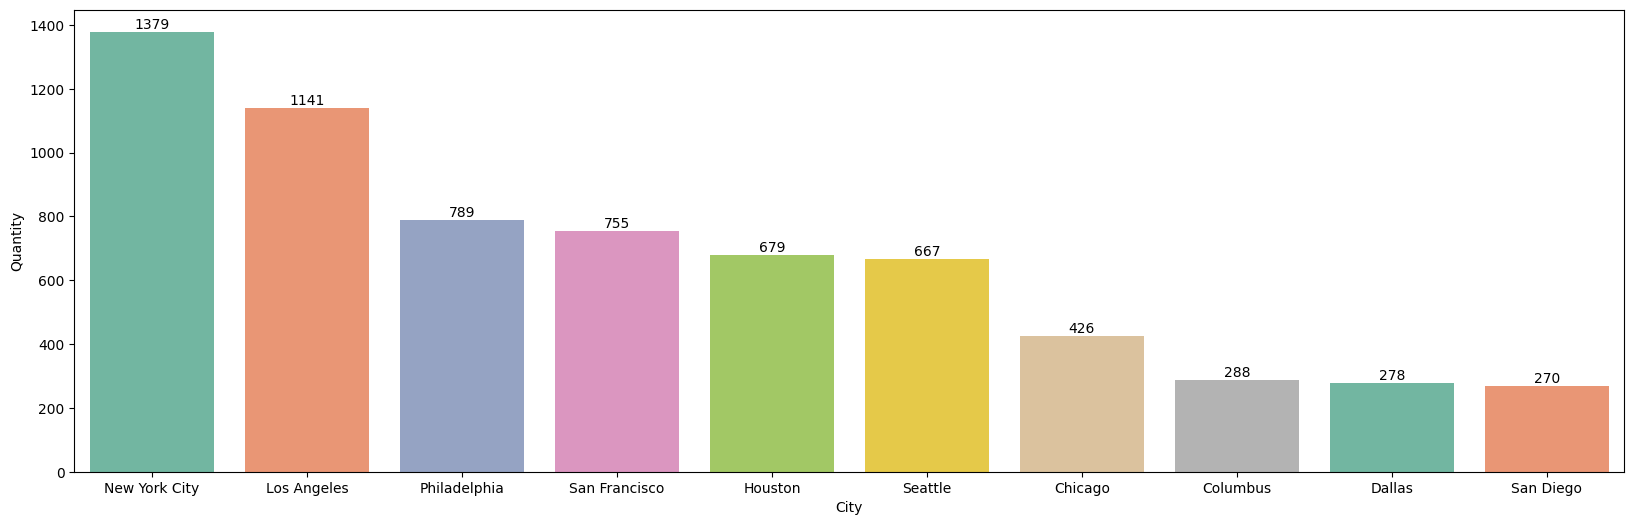

In [29]:
df_city=df1.groupby(['City'],as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending=False).head(10)
plt.figure(figsize=(20,6))
ax=sns.barplot(data=df_city,x='City',y='Quantity',palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars)

C:\Users\manee\AppData\Local\Temp\ipykernel_15280\2952613829.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df_city,x='City',y='Profit',palette='Set2')


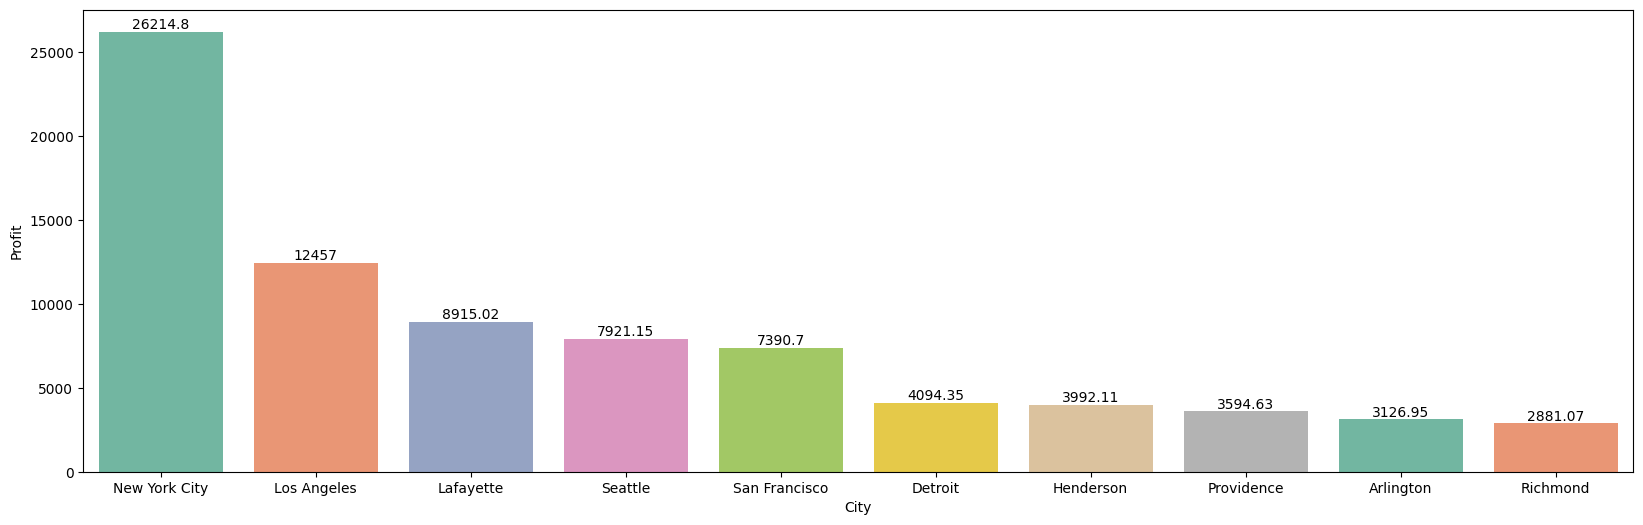

In [30]:
df_city=df1.groupby(['City'],as_index=False)['Profit'].sum().sort_values(by='Profit',ascending=False).head(10)
plt.figure(figsize=(20,6))
ax=sns.barplot(data=df_city,x='City',y='Profit',palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars)

In [31]:
df_state=df1.groupby(['State'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False).head(10)

C:\Users\manee\AppData\Local\Temp\ipykernel_15280\2490472718.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df_state,x='State',y='Sales',palette='Set2')


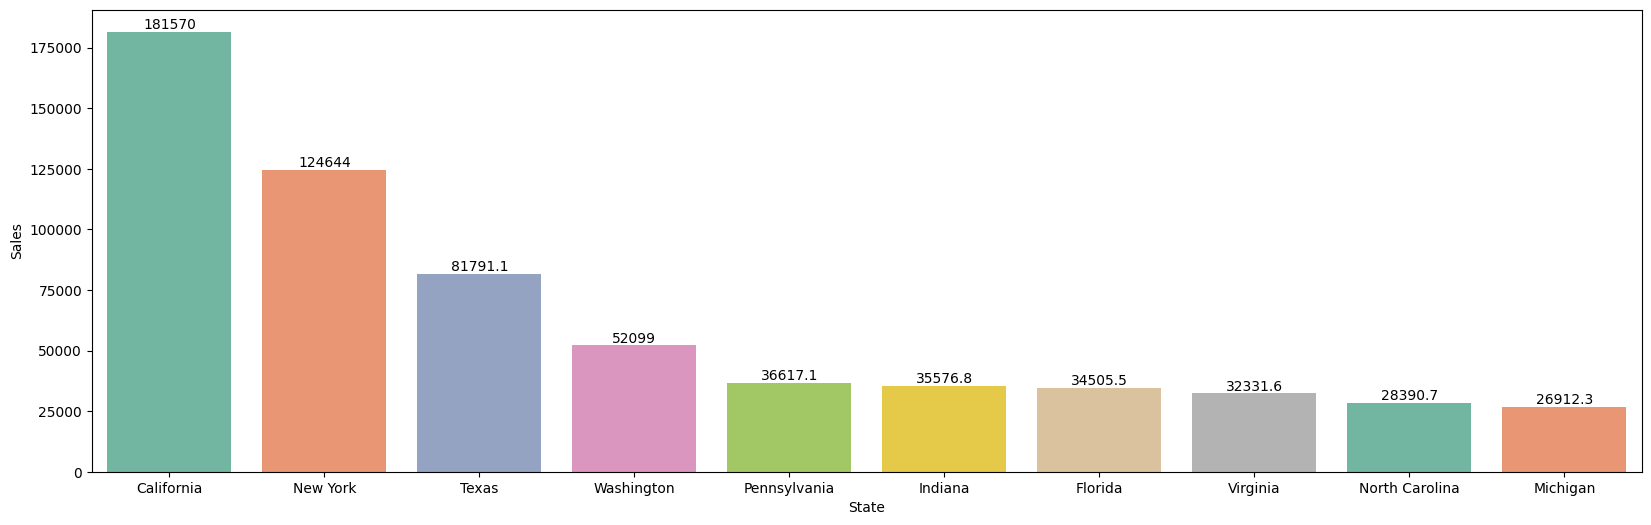

In [32]:
plt.figure(figsize=(20,6))
ax=sns.barplot(data=df_state,x='State',y='Sales',palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars)

C:\Users\manee\AppData\Local\Temp\ipykernel_15280\2192377572.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df_state,x='State',y='Quantity',palette='Set2')


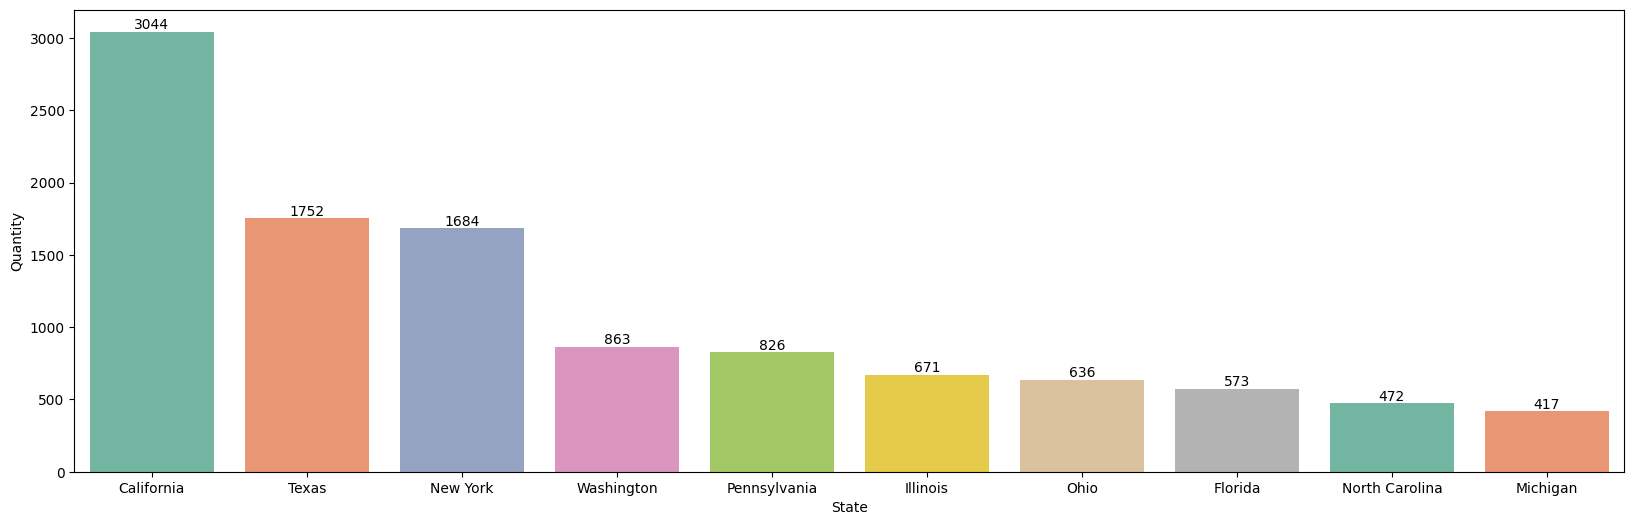

In [33]:
df_state=df1.groupby(['State'],as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending=False).head(10)
plt.figure(figsize=(20,6))
ax=sns.barplot(data=df_state,x='State',y='Quantity',palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars)

C:\Users\manee\AppData\Local\Temp\ipykernel_15280\3484341880.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df_state,x='State',y='Profit',palette='Set2')


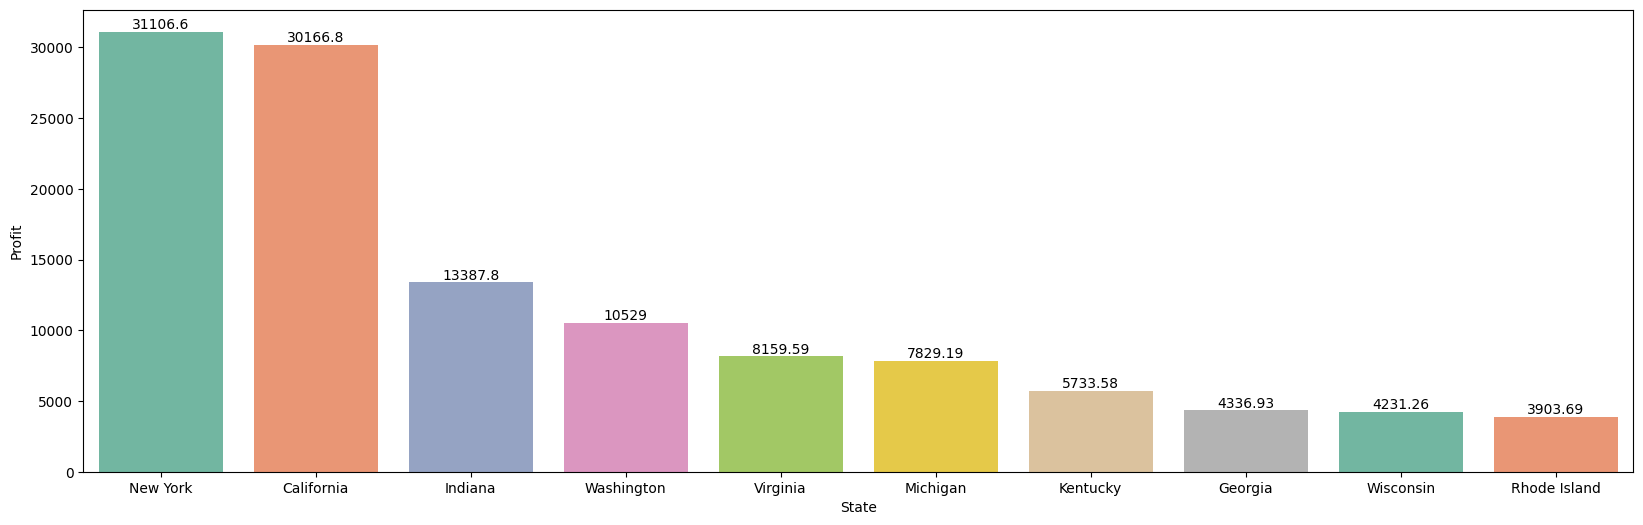

In [34]:
df_state=df1.groupby(['State'],as_index=False)['Profit'].sum().sort_values(by='Profit',ascending=False).head(10)
plt.figure(figsize=(20,6))
ax=sns.barplot(data=df_state,x='State',y='Profit',palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars)

In [35]:
df.columns

Index(['Row ID', 'Order ID', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit', 'date', 'year', 'monthname', 'day',
       'dayname'],
      dtype='object')

C:\Users\manee\AppData\Local\Temp\ipykernel_15280\871277221.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=region,x='Region',y='Sales',palette='Set2')


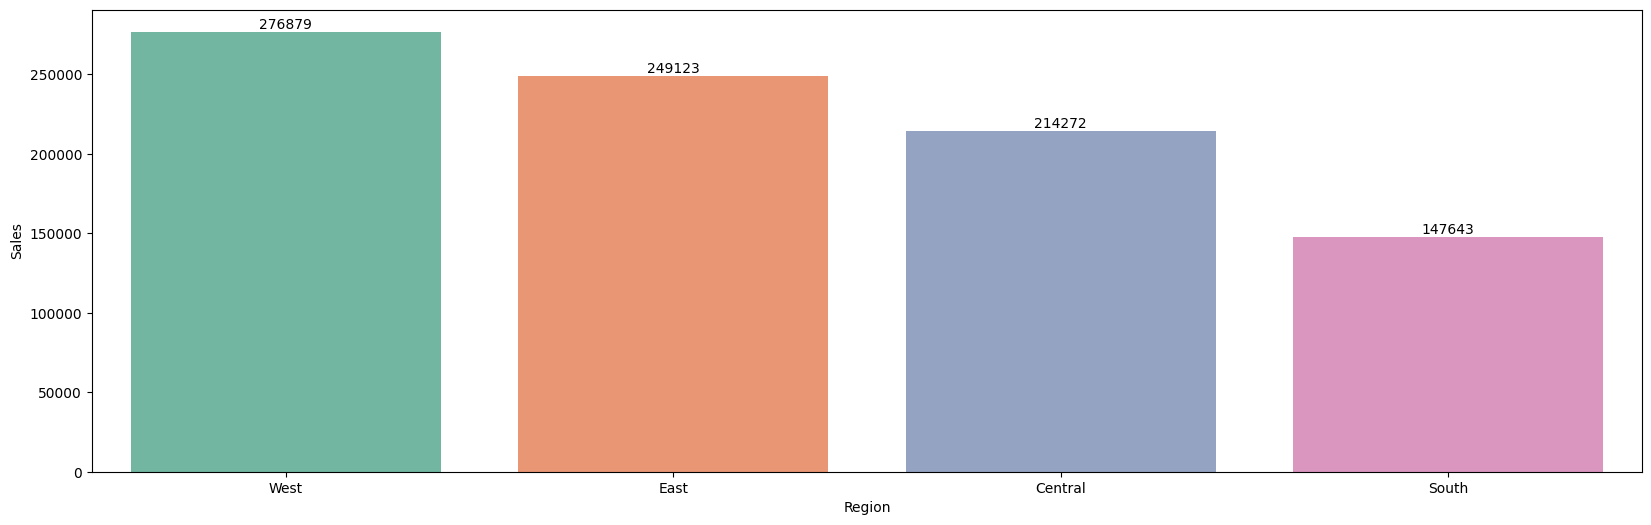

In [36]:
# by region wise analysis
region=df1.groupby(['Region'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False)
plt.figure(figsize=(20,6))
ax=sns.barplot(data=region,x='Region',y='Sales',palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars)

C:\Users\manee\AppData\Local\Temp\ipykernel_15280\2722559389.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=region,x='Region',y='Quantity',palette='Set2')


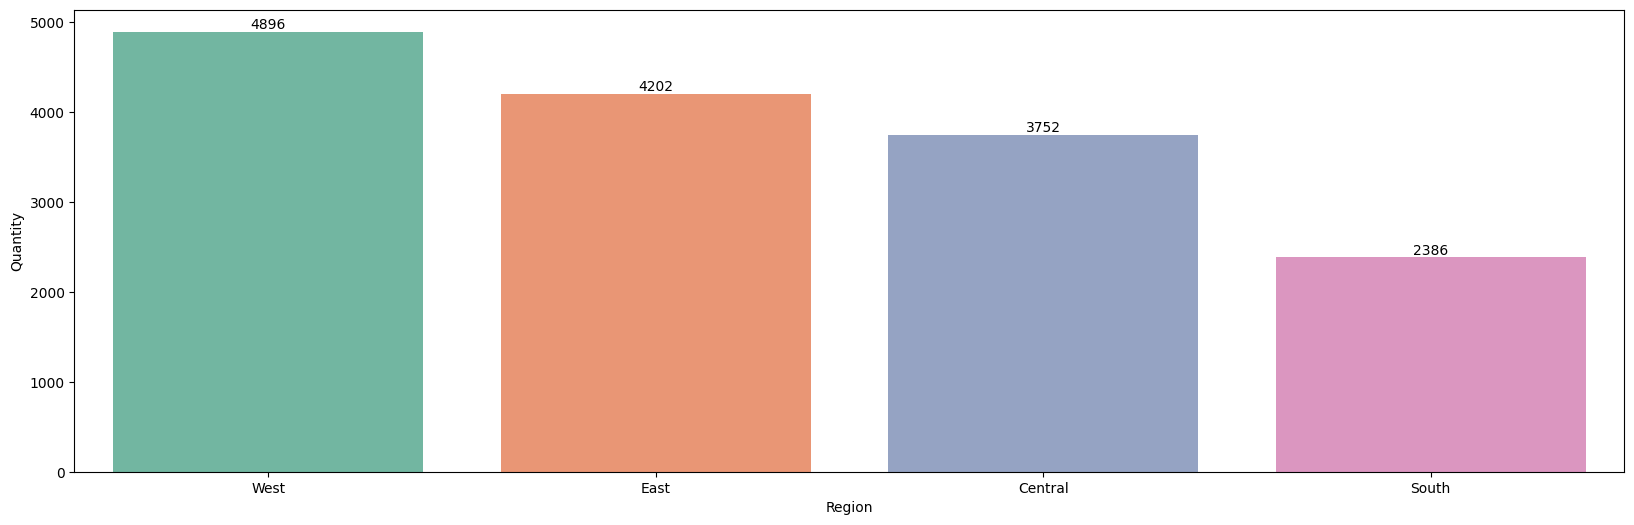

In [37]:
# by region wise analysis
region=df1.groupby(['Region'],as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending=False)
plt.figure(figsize=(20,6))
ax=sns.barplot(data=region,x='Region',y='Quantity',palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars)

C:\Users\manee\AppData\Local\Temp\ipykernel_15280\1767232494.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=region,x='Region',y='Profit',palette='Set2')


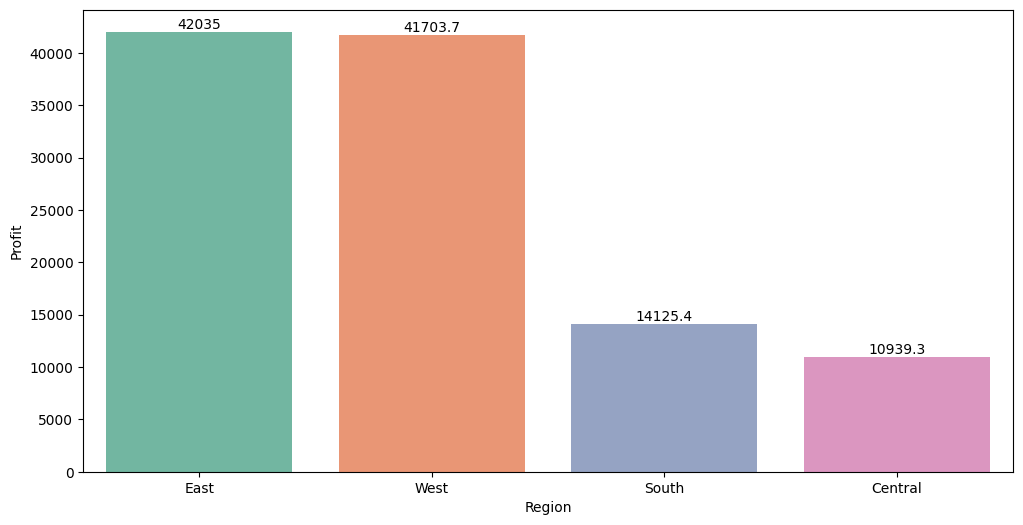

In [38]:
# by region wise analysis
region=df1.groupby(['Region'],as_index=False)['Profit'].sum().sort_values(by='Profit',ascending=False)
plt.figure(figsize=(12,6))
ax=sns.barplot(data=region,x='Region',y='Profit',palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars)

# creating line chart for the time based analysis

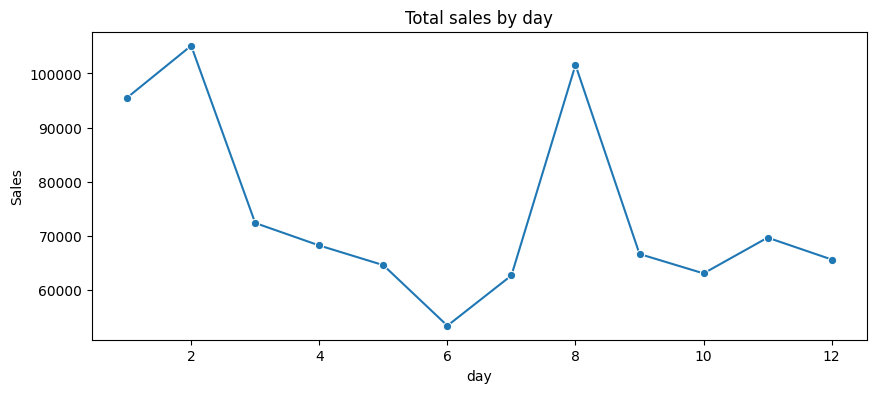

In [39]:
# line chart for the day
df_day = df1.groupby('day')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 4))
sns.lineplot(data=df_day.reset_index(), x='day', y='Sales', marker='o')
plt.title('Total sales by day')
plt.show()

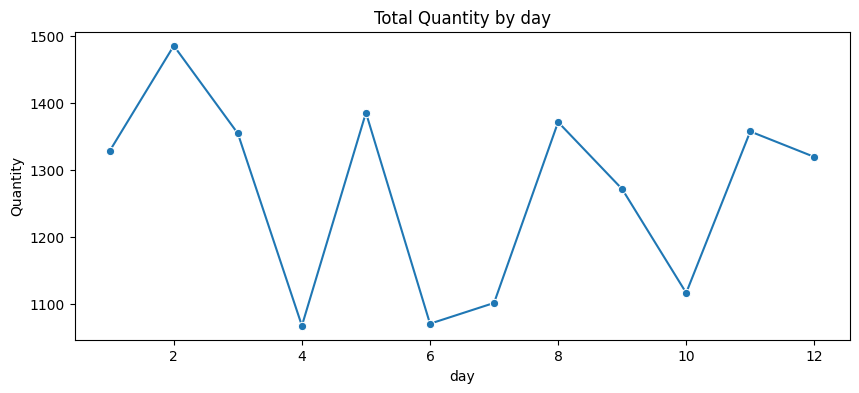

In [40]:
df_day = df1.groupby('day')['Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 4))
sns.lineplot(data=df_day.reset_index(), x='day', y='Quantity', marker='o')
plt.title('Total Quantity by day')
plt.show()

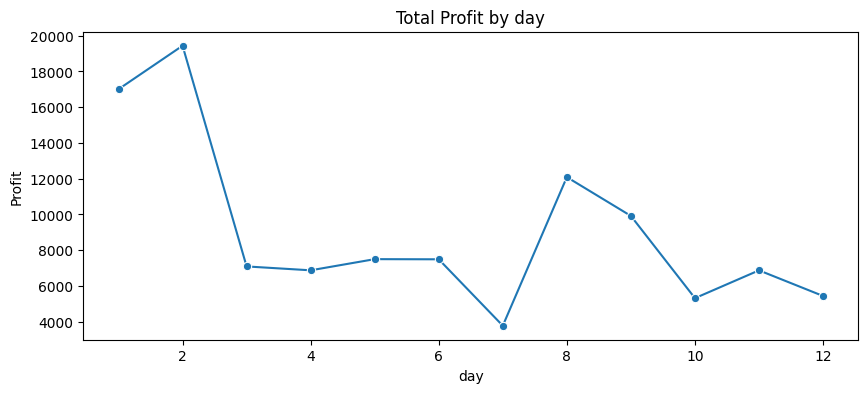

In [41]:
df_day = df1.groupby('day')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 4))
sns.lineplot(data=df_day.reset_index(), x='day', y='Profit', marker='o')
plt.title('Total Profit by day')
plt.show()

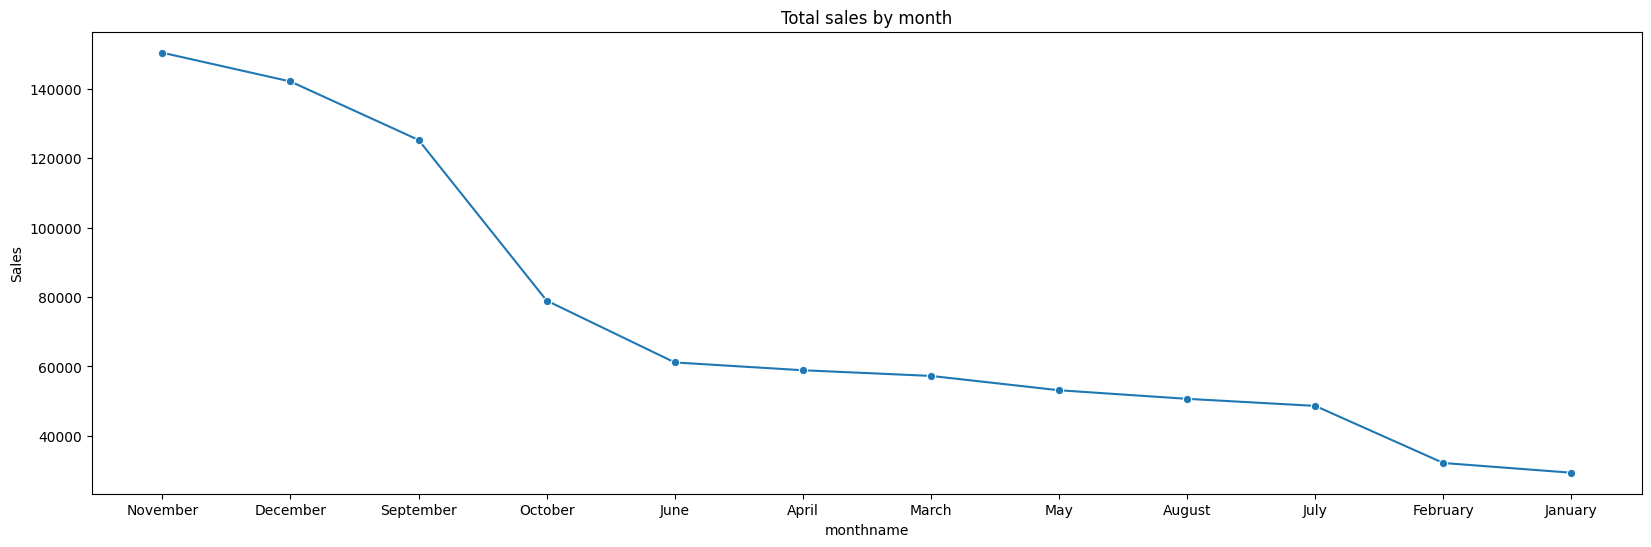

In [42]:
df_day = df1.groupby('monthname')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(20, 6))
sns.lineplot(data=df_day.reset_index(), x='monthname', y='Sales', marker='o')
plt.title('Total sales by month')
plt.show()

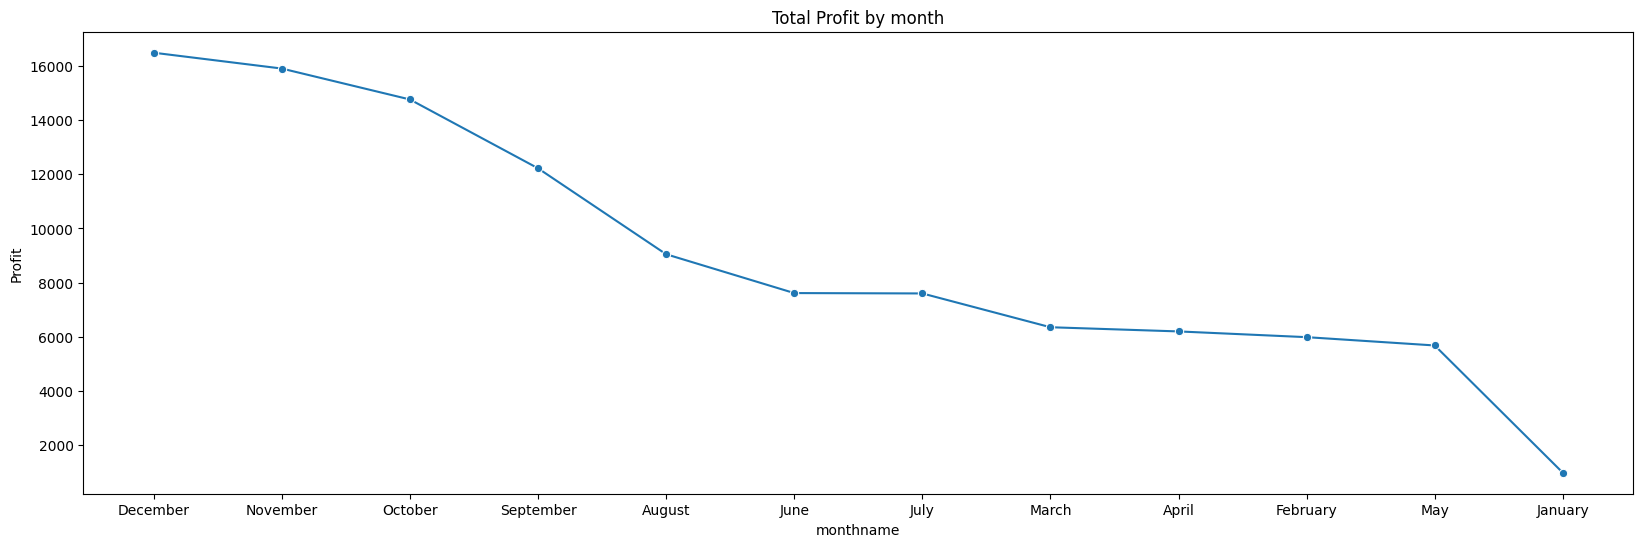

In [43]:
df_day = df1.groupby('monthname')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(20, 6))
sns.lineplot(data=df_day.reset_index(), x='monthname', y='Profit', marker='o')
plt.title('Total Profit by month')
plt.show()

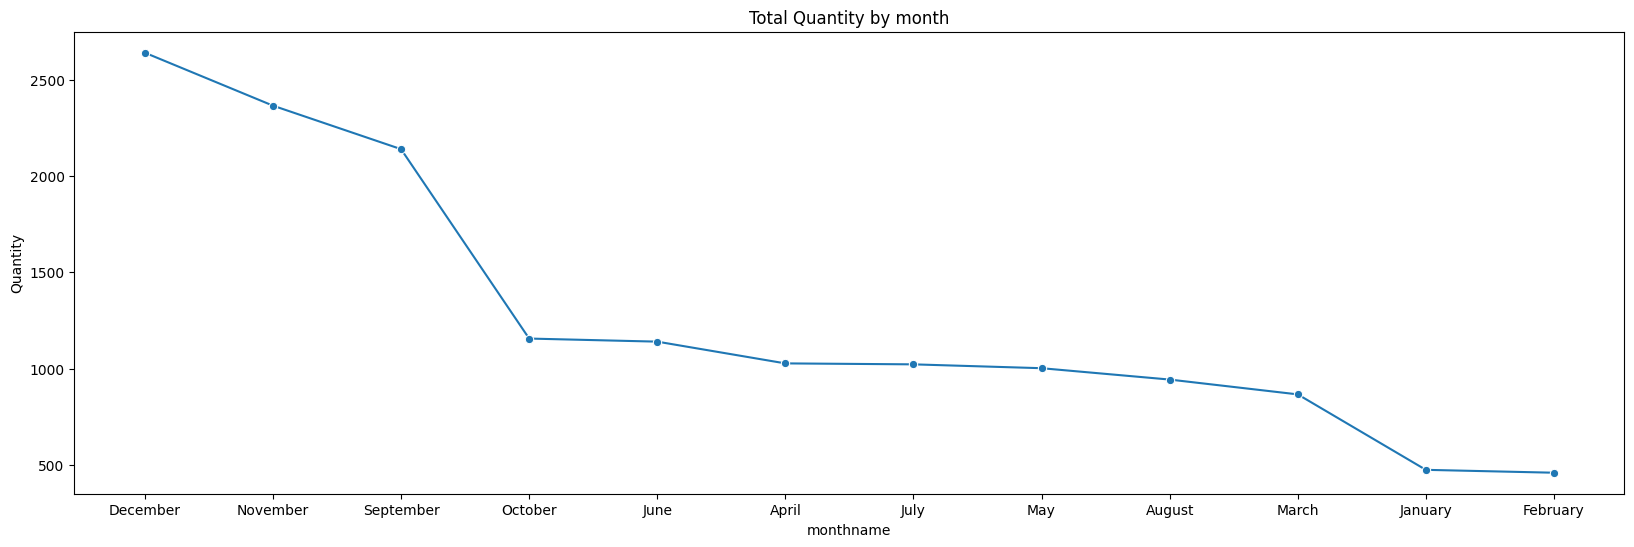

In [44]:
df_day = df1.groupby('monthname')['Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(20, 6))
sns.lineplot(data=df_day.reset_index(), x='monthname', y='Quantity', marker='o')
plt.title('Total Quantity by month')
plt.show()

C:\Users\manee\AppData\Local\Temp\ipykernel_15280\1374319560.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df_region,x='Region',y='Sales',palette='Set2')


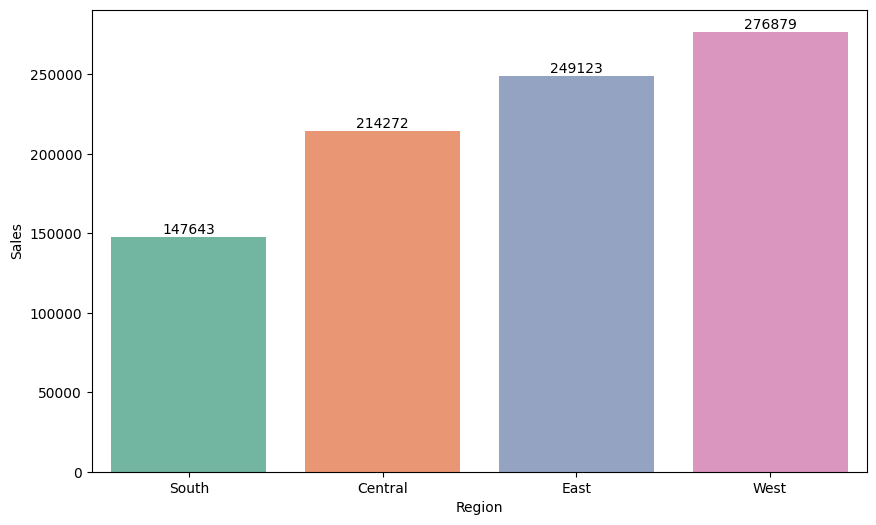

In [45]:
# total sales by resgion
df_region=df1.groupby(['Region'],as_index=False)['Sales'].sum().sort_values(by='Sales')
plt.figure(figsize=(10,6))
ax=sns.barplot(data=df_region,x='Region',y='Sales',palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars)

C:\Users\manee\AppData\Local\Temp\ipykernel_15280\2023827338.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df_region,x=x,y=y,palette='Set2')


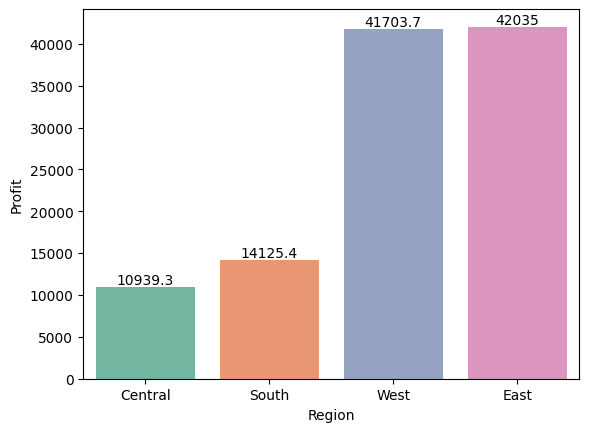

In [48]:
def create_bar(df,x,y):
    df_region=df.groupby([x],as_index=False)[y].sum().sort_values(by=y)
    ax=sns.barplot(data=df_region,x=x,y=y,palette='Set2')
    for bars in ax.containers:
        ax.bar_label(bars)
create_bar(df1,'Region','Profit')

C:\Users\manee\AppData\Local\Temp\ipykernel_15280\2023827338.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df_region,x=x,y=y,palette='Set2')


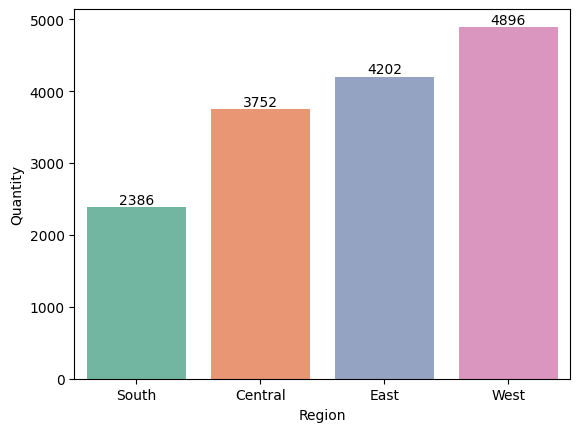

In [49]:
create_bar(df1,'Region','Quantity')

In [50]:
df1.columns

Index(['Row ID', 'Order ID', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit', 'date', 'year', 'monthname', 'day',
       'dayname'],
      dtype='object')

C:\Users\manee\AppData\Local\Temp\ipykernel_15280\1036235977.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df_x,x=x,y=y,palette='Set2')


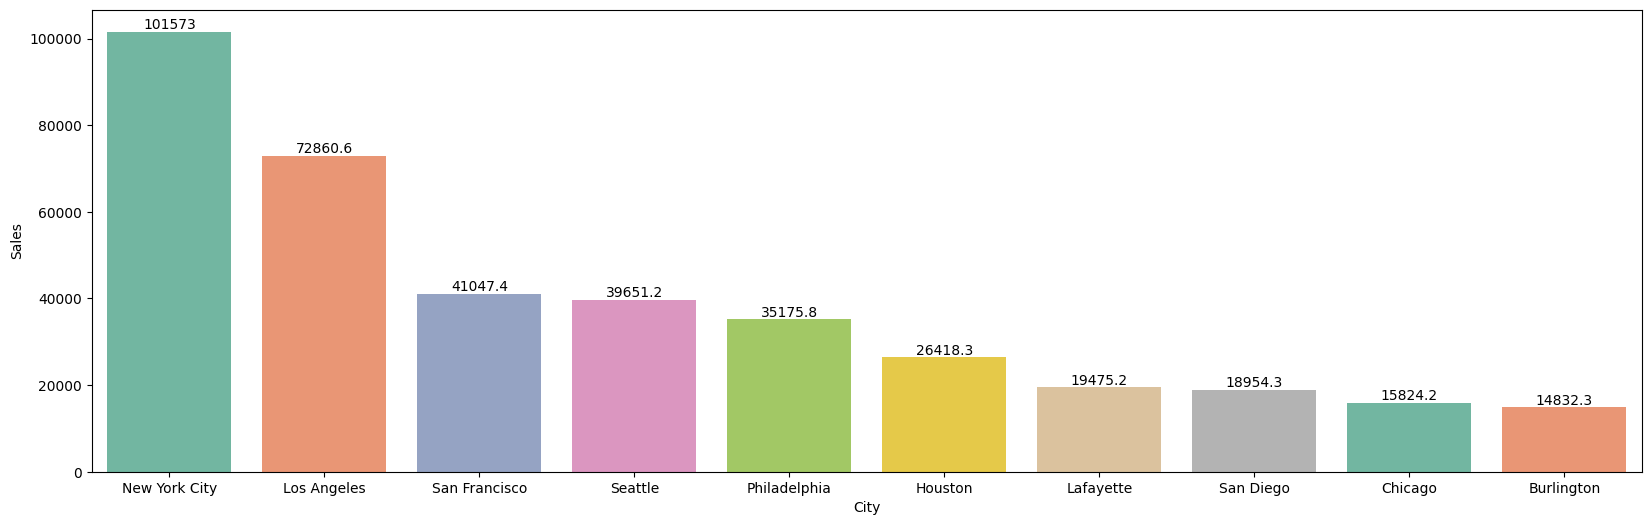

In [52]:
def create_bar_10(df,x,y):
    # grouping data sets
    df_x=df.groupby([x],as_index=False)[y].sum().sort_values(by=y,ascending=False).head(10)
    
    plt.figure(figsize=(20,6))
    ax=sns.barplot(data=df_x,x=x,y=y,palette='Set2')
    for bars in ax.containers:
        ax.bar_label(bars)
create_bar_10(df1,'City','Sales')

C:\Users\manee\AppData\Local\Temp\ipykernel_15280\1036235977.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df_x,x=x,y=y,palette='Set2')


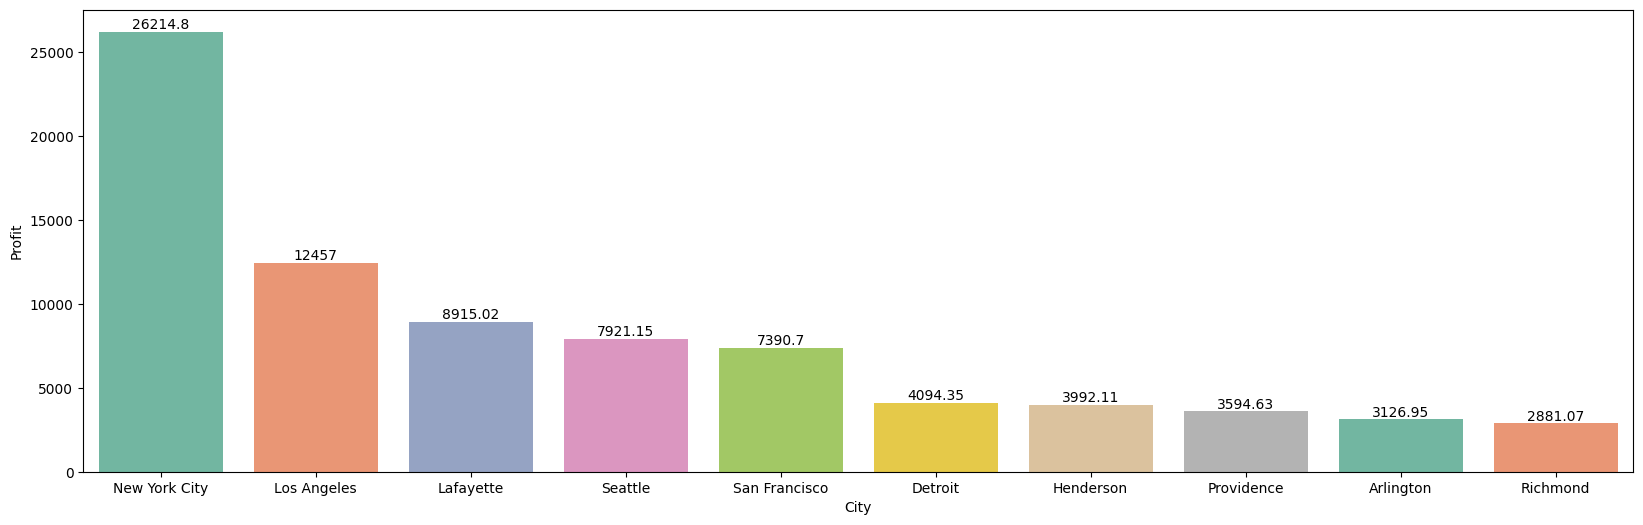

In [53]:
create_bar_10(df1,'City','Profit')

C:\Users\manee\AppData\Local\Temp\ipykernel_15280\1036235977.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df_x,x=x,y=y,palette='Set2')


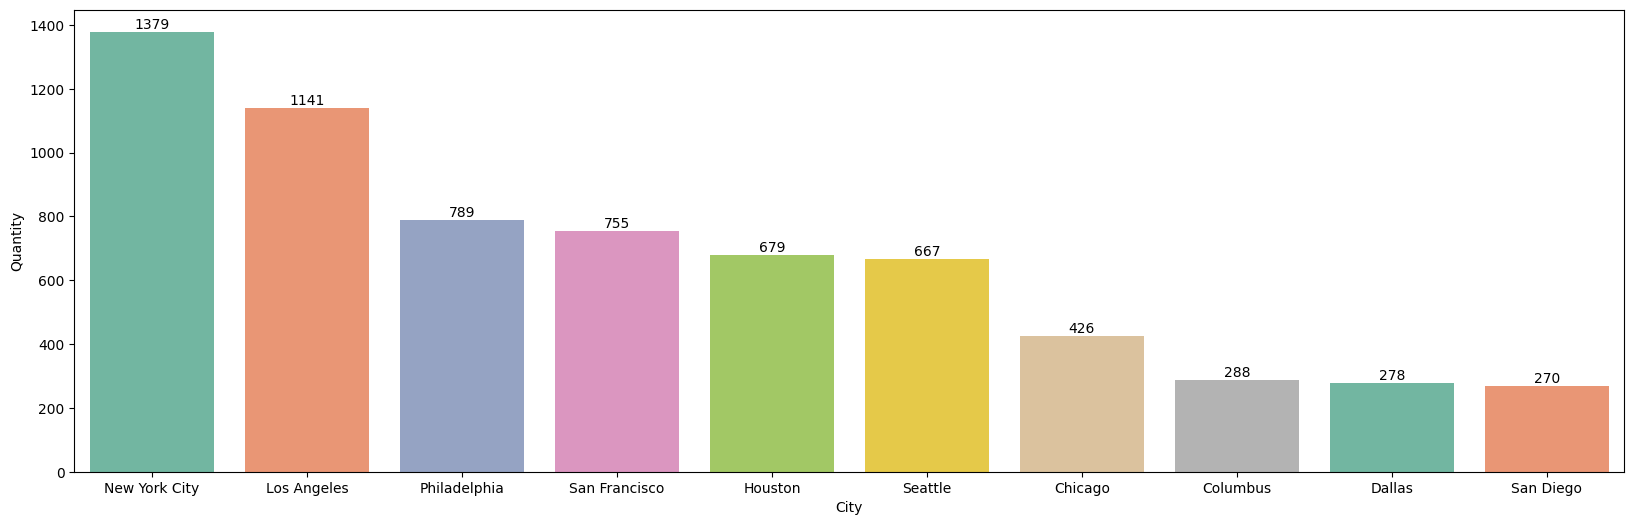

In [54]:
create_bar_10(df1,'City','Quantity')

C:\Users\manee\AppData\Local\Temp\ipykernel_15280\2023827338.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df_region,x=x,y=y,palette='Set2')


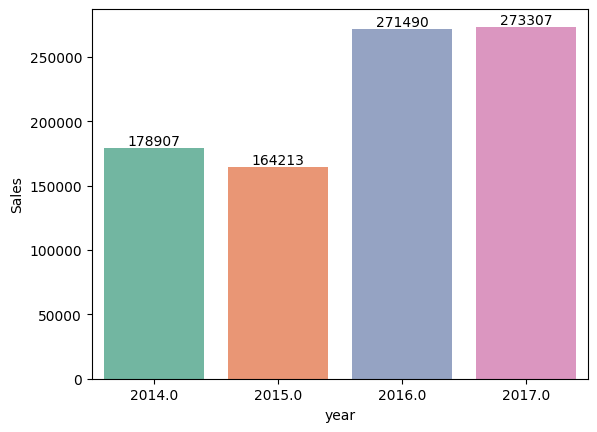

In [55]:
create_bar(df1,'year','Sales')

C:\Users\manee\AppData\Local\Temp\ipykernel_15280\2023827338.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df_region,x=x,y=y,palette='Set2')


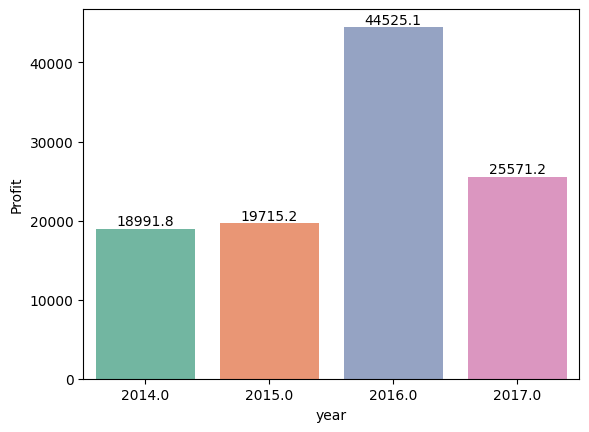

In [56]:
create_bar(df1,'year','Profit')

C:\Users\manee\AppData\Local\Temp\ipykernel_15280\2023827338.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df_region,x=x,y=y,palette='Set2')


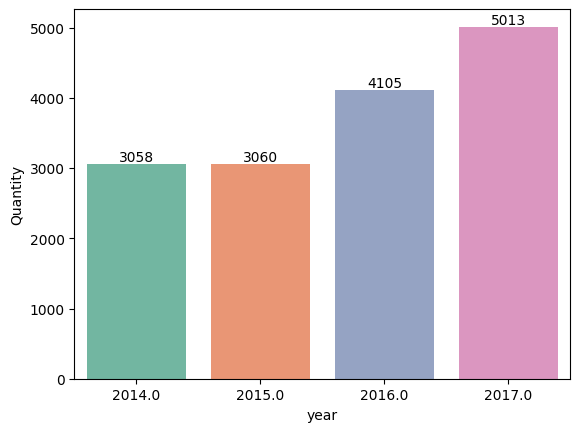

In [57]:
create_bar(df1,'year','Quantity')

In [58]:
#  creating lag values for features

df1['lag1']=df1['Sales'].shift(1)

In [59]:
df1['rolling_mean_3'] = df1['Sales'].rolling(window=3).mean()


In [60]:
df1.head()

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,...,Quantity,Discount,Profit,date,year,monthname,day,dayname,lag1,rolling_mean_3
0,1,CA-2016-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,2,0.00,41.9136,2016-11-08,2016.0,November,8.0,Tuesday,NaN,NaN
1,2,CA-2016-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,3,0.00,219.5820,2016-11-08,2016.0,November,8.0,Tuesday,261.9600,NaN
2,3,CA-2016-138688,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,...,2,0.00,6.8714,2016-06-12,2016.0,June,12.0,Sunday,731.9400,336.173333
3,4,US-2015-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,...,5,0.45,-383.0310,2015-10-11,2015.0,October,11.0,Sunday,14.6200,568.045833
4,5,US-2015-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,...,2,0.20,2.5164,2015-10-11,2015.0,October,11.0,Sunday,957.5775,331.521833


In [61]:
df1.isnull().sum()

Row ID            0
Order ID          0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
date              0
year              0
monthname         0
day               0
dayname           0
lag1              1
rolling_mean_3    2
dtype: int64

In [62]:
df1.dropna(inplace=True)

In [67]:
# Correct way to divide the dataset into train and test datasets
train = df1[df1['year'].isin([2014, 2015, 2016])]
test = df1[df1['year'] == 2017]

In [68]:
print(train.shape)

(2718, 26)


In [71]:
df_monthly=df1.groupby('monthname')['Sales'].sum()

In [69]:
test.shape

(1322, 26)

In [70]:
from statsmodels.tsa.arima_model import ARIMA

In [73]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model (1, 1, 1 is an example order)
model = ARIMA(df_monthly, order=(1,1,1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

C:\Users\manee\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\manee\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\manee\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\manee\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: V

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   12
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -134.408
Date:                Fri, 20 Sep 2024   AIC                            274.817
Time:                        11:40:17   BIC                            276.011
Sample:                             0   HQIC                           274.064
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1235      0.441     -0.280      0.779      -0.987       0.740
ma.L1         -0.6540      0.416     -1.572      0.116      -1.469       0.161
sigma2      1.509e+09   1.53e-11   9.87e+19      0.0

In [74]:
# forecast future sales

forecast=model_fit.forecast(steps=12)

C:\Users\manee\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\manee\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [75]:
forecast

12    93477.204522
13    97400.347431
14    96915.831102
15    96975.669879
16    96968.279665
17    96969.192372
18    96969.079651
19    96969.093572
20    96969.091853
21    96969.092065
22    96969.092039
23    96969.092042
Name: predicted_mean, dtype: float64

In [76]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['Sales'], forecast)

ValueError: Found input variables with inconsistent numbers of samples: [1322, 12]